<a href="https://colab.research.google.com/github/ShiYang1101/CIFAR10_SVD_JAX/blob/main/Copy_of_Shi_Yang_Lee_C4AIScholars_takehome_challenge_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C4AI Scholars Program Takehome Challenge


### Background

Welcome to the C4AI Scholars Program Take-Home Challenge! This exercise is designed to allow you to showcase your engineering and problem solving skills. The Challenge consists of three parts:

* Part One of the challenge requires identifying bugs, and getting the code working. This is designed to test your ability to grapple with real world engineering challenges.
* Part Two of the challenge tests your ability to generate code for a specified problem. 
* Part Three of the challenge is an opportunity for you to attempt an optional challenge question that extends the original problem set. 


These tasks were chosen as a setting to see how you think about problems, even if they are not in your own research field of interest. The tasks and dataset are not meant to be indicative of the research goals of the Scholar Program. We purposefully have selected a simple toy problem so the focus is on how you think, and does not require significant machine learning resources. 

Good luck! If you have questions about the framing of the questions, please contact info@for.ai  


### How to Use and Submit this Document

* **Make a copy of this document** and **rename** it **Firstname_Lastname_C4AIScholarsChallenge**
* Once you’ve completed all tasks, **save and pin your revisions**
* **Submit a link** to your final document via the [Cohere For AI Scholars Program application](https://jobs.lever.co/cohere/?department=Cohere%20For%20AI). 



---



## Overview of Singular Value Decomposition

In this takehome, you will be working on a problem involving singular value decomposition. Singular Value Decomposition (SVD) exists for every rectangular matrix. The nice thing about SVD is that the original matrix can be expressed as the sum of outer products of left and singular vectors scaled by the corresponding singular values. Formally:

> Let 𝛢 be a rectangular matrix of dimensions 𝑚𝘹𝑛, then the SVD of the matrix A is given by $ A = U𝛴V^T$ where $U$ is an orthogonal matrix of shape mxm containing the left singular vectors, $V$ is an orthogonal matrix of shape nxn containing the right singular vectors and $𝛴$ is a diagonal matrix containing the singular values of $A$. This formulation of SVD can be re-expressed as \begin{align} A = \sum_{i=1}^{r} s_i. u_i v_i^T \end{align} where $r = \text{min}(m,n)$ represents the rank of the matrix, $s_i$ is the $i$th singular value and $u_i v_i^T$ is the outer product of the $i$th left and right singular vectors. 

<!-- \begin{align}
A = \sum_{i=1}^{\text{min}(m,n)} s_i. u_i v_i^T
\end{align}
\begin{align} -->

> The singular values $𝛴$ are decreasing in order. So, each outer product is scaled by a smaller value as we compute each term in the sum above. This gives us an opportunity to approximate $A$ using only the sum of the first $k$ outer products where $k < \text{min}(m,n)$ $-$ this effectively means that we are zero-ing out some of the singular values by assuming that the contribution to the sum is negligible. This is called low-rank approximation.

If you aren't familiar with singular value decomposition, or the above feels rusty, don't worry. Take a moment to brush up your knowledge using any of the following resources:
* [stanford lecture notes on low rank approximations](https://web.stanford.edu/class/cs168/l/l9.pdf)
* [youtube series of short and beginner friendly lectures](https://www.youtube.com/watch?v=gXbThCXjZFM&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv)



## Check for understanding (3 points)

#### Q1: What are some real world applications of low rank approximations?


#### Answer:
* Reducing noice from the data. SVD decomposes matrix into combination on rank 1 matrices (the left and right matrices, correponding to the contribution and the 'feature vectors' itself). The right feature vector matrices represents the latent feature which could represents some aspect of the data. By only including the important latent features, SVD aims to reduce the contibution of unsignificant latent features, and hence denoising the data.

* Reduce computational storage requirement. Suppose a data is represented by a m X n matrix, it would represents that there is m X n numbers to be saved, whereas by compressing the matrix in low-rank approximations, the number can be reduced to k(m + n), where k represents the rank chosen. 

* Recommendation engine. In market basket analysis or collaborative filtering, SVD can represents the whole customer-items relation in the left and right matrices in SVD (especially in the Netflix competition, SVD were used for finding the latent features of viewers and titles, and incorporating the extremely sparse matrix).

* Although not entirely related, SVD can also be used in calculation of spectral decomposition, which relates to eigenvectors of square matrices. In fact, SVD and spectral decomposition has a very close relation in the low-rank parroximated matrices, with some appropriate mathematical manipulation, they can be equivalence!



#### Q2: What are the benefits of compressing a deep neural network? How would you measure the benefits of compression?


#### Answer: 

* Neural network is expensive to train, as a neural network with several millions of parameters is considered small, it would takes huge amount of computational resources and Co2 emission to produce a usable network. Thinking of the usage of neural network in corporate, a reduce in 20% in training resource needed will be much more impactful than remember to turn off the light everyday.

* Compressing the neural network significantly reduces the training time and parameter saved, especially in embedded machine learning (eg, small device with deployable network, such as drone with wounds classification using image classification), a smaller network is essential.

* The benefits of compression and be measured by the trade off of accuracies and inference time. 

#### Q3: In this takehome, we will consider how singular value decomposition can be used to compress a deep neural network. Compared to other compression methods used for deep neural networks such as pruning, quantization, or efficient architectures, what are the relative merits/demerits of low rank approximations? Choose one or two alternative compression methods and compare with singular value decomposition.

#### Answer:

The first alternative of low rank approximation is the pruning. The process goes by ranking each neurons of the neural network, ranking the most imporant neuraons, and eliminating neurons which are not so significant until a condition had been met. The eleimation can be achieved by regulariztion (l1 regularization of weights tends to remove more neurons), or by eliminating neurons with similar weights in a layer. The effect of pruning can then be evaluate by considering the trade off of scoring and computational efficiency improvement.

Since pruning is not limited to the architect of neural network (similar to drop out, as individual neurons can be removed), pruning technique is more flexible, and could be applied for diverge ranges of architecture like graph network.

A quantization technique is simply reducing the memory space used in a neural network, either by rounding and truncating parameters.


A low-rank approximation might be a better choice for layers with high dimensionality, as the effect of parameters reduction is more significant (O(m*n) to O(k(m+n)).

A good comparison of different compression technique can be seen below, reference from this [paper](http://graduatestudent.ucmerced.edu/yidelbayev/papers/ijcnn21/ijcnn21c.pdf), which also included some interesting compression techniques on the same CIFAR10 dataset!

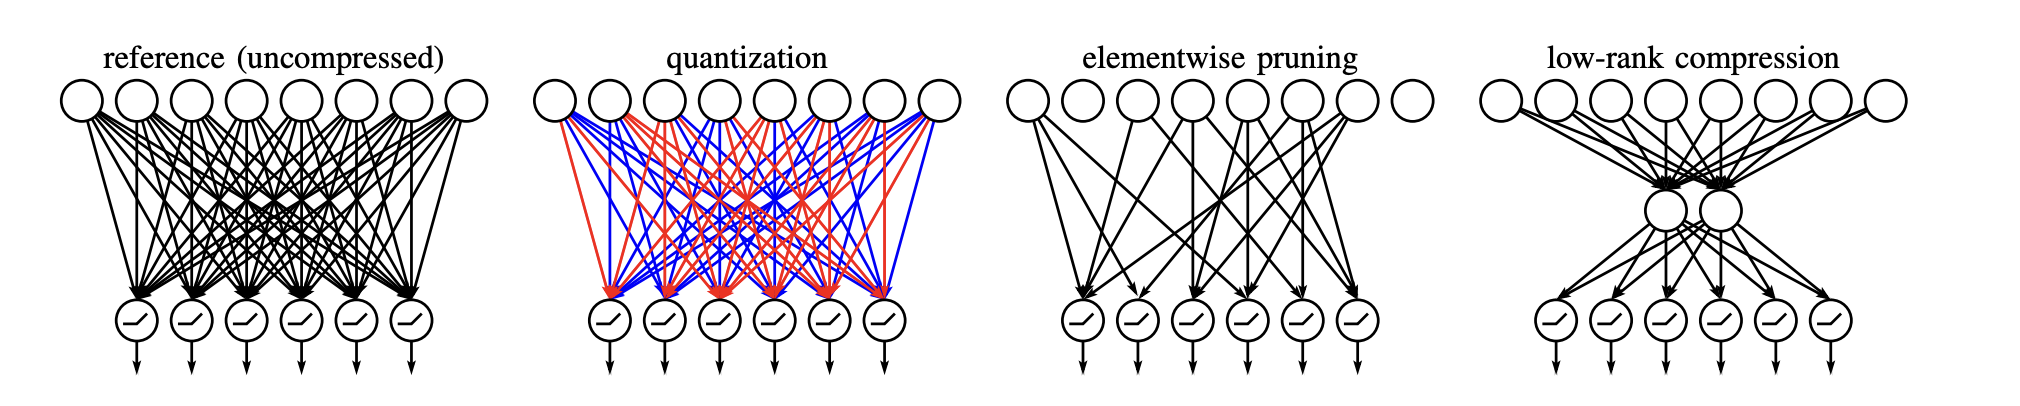



---



### Imports

In [ ]:
!pip install dm-haiku optax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 350 kB 4.7 MB/s 
     |████████████████████████████████| 145 kB 81.1 MB/s 
     |████████████████████████████████| 85 kB 4.8 MB/s 


In [ ]:
from typing import Iterator, Mapping, Tuple, Any, Optional, Union
from copy import deepcopy
import time
from absl import app
import haiku as hk
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import numpy as np
import optax
import tensorflow_datasets as tfds
import tensorflow as tf
from functools import partial
import math

Batch = Tuple[np.ndarray, np.ndarray]

In [ ]:
!pip install jaxopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.0 MB/s 


In [ ]:
import jaxopt



---




## Coding Challenge Part I : Debugging Challenge (10 Points)


We are now going to explore using SVD to compute low rank approximations of the parameters of a small deep neural network. You are using a very simple toy model as a first baseline. Section 3 will give you the chance to improve baseline accuracy beyond this very simple model -- this is just a toy setting to first explore low rank approximations.

The first part of this challenge is primarily a debugging challenge. It will require removing bugs in order to train a very simple network. We have introduced several bugs -- some are subtle and will not break your code but will degrade final performance. These subtle bugs are introduced to understand your grasp of fundamental machine learning principles. There are also more obvious bugs designed to break your code. 

* [**4 points**] Your goal is to get the code working. There are 4 bugs in the code, all 4 of these are subtle bugs which are designed to impair test accuracy but not break the code. You will get partial points for each of the 4 bugs you find. After finding all bugs, your test performance should be around 66-67% test accuracy. 

* [**2 points**] We will give extra points for also adding improved documentation to each of the functions we introduce in this section, and for describing the fixes to the bugs. 

* [**4 points**] There are also two functions you will need to code up in this section -- we indicate where these code changes need to happen with TODO comments. 

* Do not alter the model architecture or the learning rate.


Useful tips:
* To iterate faster and avoid training for 10000 steps each time you want to test whether you have found all the bugs, a good sign you have caught the bugs is wheter after 1000/10000 steps your accuracy >40%.
* The colab difftool is useful to track what code you have changed during the debugging challenge (incase you need to revert code). You can access this via tools > diff notebooks.

# Data Introduction

Here we will be using the famous CIFAR10 dataset, which consists of images of 10 classes.

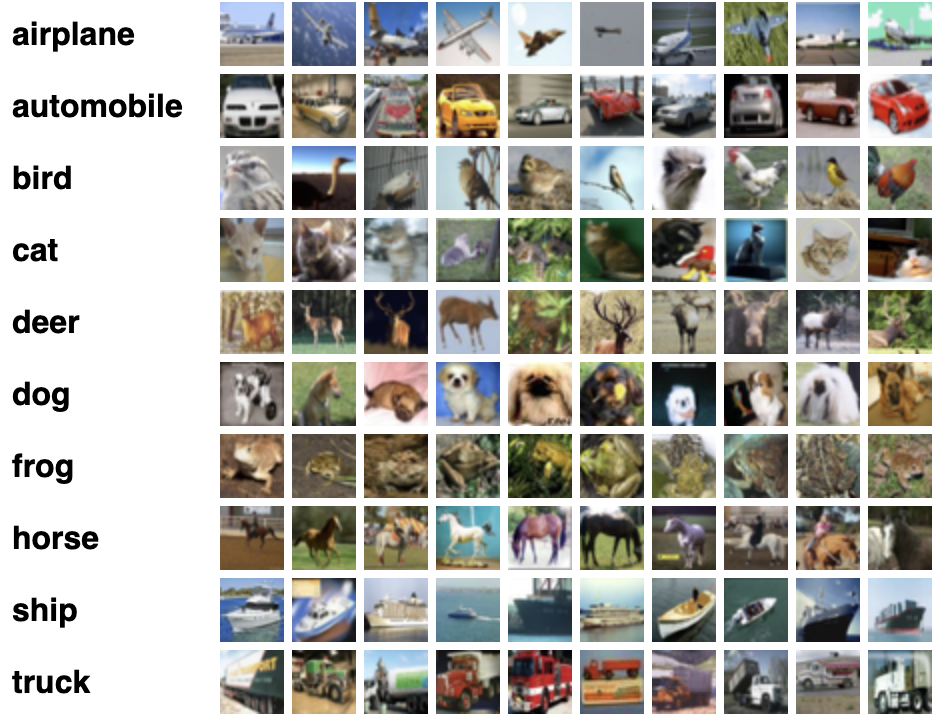


In [ ]:
CIFAR10_MEAN = (0.4914, 0.4822, 0.4465)
CIFAR10_STD = (0.2023, 0.1994, 0.2010)


# Not a good idea to hard coding variable variables to be used inside the function
# eg, the variables net, opt were only initiated after the functions were defined
# either initiate the variables before defining the functions, or include
# the variables as function's parameters for generalization of functions.

def net_fn(batch: Batch) -> jnp.ndarray:
  '''
  Function creating convolutional network architecture for CIFAR10 dataset.
  Utilized a normlizing standard scaler function to normalize the CIFAR10 
  image data for each colour channels.

  ---------------------------
  Input
  batch: Tuple, with the first elemtn as CIFAR10 input data, and the second 
         element as the target values. Default format for tfds.load funtion
         with parameter as_supervised set as True.
  
  ---------------------------
  Output
  Haiku sequential data type
  ---------------------------

  '''
  x = normalize_2(batch[0])
  
  # Do NOT alter the architecture definition below.
  net = hk.Sequential([
      hk.Conv2D(output_channels=6*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      jax.nn.relu,
      hk.Conv2D(output_channels=16*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      hk.Flatten(),
      hk.Linear(3000), jax.nn.relu,
      hk.Linear(2000), jax.nn.relu,
      hk.Linear(2000), jax.nn.relu,
      hk.Linear(1000), jax.nn.relu,
      hk.Linear(10),
  ])
  return net(x)

def load_dataset(
    split: str,
    *,
    is_training: bool,
    batch_size: int,
) -> Iterator[tuple]:
  """Loads the CIFAR10 dataset as a generator of batches.
  
  ---------------------------
  Input
  split: str, Tensorflow datasets split parameter. Eg 'train' for train dataset
         train[:80%] for the first 80% of training data.
  is_training: Boolean, specify if the data generated should be shuffled
  batch_size: int, number of samples to be included in each batch.

  ---------------------------
  Output: Iterable, Tensorflow dataset object as iterbles, containing features
          and target varaibles.
  
  """

  # Base on research, 
  # https://stackoverflow.com/questions/49915925/output-differences-when-changing-order-of-batch-shuffle-and-repeat
  # repeating dataset before shuffling might create dataset with repeating samples
  # in the same epoch, for best performance, the repeat procedure is modified to be 
  # after the shuffling.

  ds = tfds.load('cifar10', split=split, as_supervised=True).cache()
  if is_training:
    ds = ds.shuffle(10 * batch_size, seed=0)
  ds = ds.repeat()
  ds = ds.batch(batch_size)
  return iter(tfds.as_numpy(ds))

def compute_loss(params: hk.Params, batch: Batch, 
                 lr : float = 1e-4) -> jnp.ndarray:
  """Compute the loss of the network, including L2 regularization penalty
  for weights, excluding bias terms.
  
  ---------------------------
  Input
  params: hk.Params, including weights and bias parameters.
  batch: np.array, where first element represents the image data of CIFAR10 data
         , and second element of true class, ranging from 0 to 9
  lr: float, regularization strength to be used for the l2 penalty.
  
  ---------------------------
  Output: float, average loss of the batch data
  """
  x, y = batch
  logits = net.apply(params, batch)
  labels = jax.nn.one_hot(y, 10)

  # TODO: add code below to compute the l2_loss variable
  # Computing the l2_loss with the sum of all squared weights
  # A cross-validation or grid search should be implemented to find the 
  # appropriate best hyperparameters.

  # jaxopt function for l2 calculation of all weights
  l2_loss = jaxopt.tree_util.tree_l2_norm(params, squared=True)

  # Alternatively, a manual square of all weights can be computed directly
  # from the params variable

  # l2_loss = sum([jnp.sum(jnp.square(x['w'])) for x in iter(params.values())])

  # Weighted l2 loss is slightly redundant as the same could be achieved by
  # setting different regularization strength.

  # BUG: regularization terms not weighted properly
  weighted_l2_loss = l2_loss / x.shape[0]

  # BUG: softmax loss terms not weighted properly
  softmax_xent = -jnp.sum(labels * jax.nn.log_softmax(logits)) / x.shape[0]

  # BUG: Instead of adding the cross-entropy, a minus was used
  # Ideally, the 1e-4 regularization strength should be specified as a function
  # parameter, for further hyperparemeter optimization.
  return softmax_xent + (lr * weighted_l2_loss)


@jax.jit
def compute_accuracy(params: hk.Params, batch: Batch) -> jnp.ndarray:
  '''
  Function computing the resulting accury for inputted parameters and batch data

  ---------------------------
  Input
  params: hk.Params, parameters to be used for generating predictions
  batch: np.array, data to be used for generating predictions

  ---------------------------
  Output: float, accuracy of predictions 
  '''
  predictions = net.apply(params, batch)

  # sanity checking that batch contains target values
  assert batch.__len__() == 2, "The input data doesn't contains target values."

  # TODO: add code below to compute the accuracy over the batch.
  hard_pred_ = jnp.argmax(predictions, axis = 1)
  accuracy = jnp.mean(hard_pred_ == batch[-1])
  return accuracy

@jax.jit
def update(
    params: hk.Params,
    opt_state: optax.OptState,
    batch: Batch,
    lr: float
) -> Tuple[hk.Params, optax.OptState]:
  '''
  Function for parameters update utilzing jax and optax library

  ----------------------------
  Input 
  params: hk.Params, parameters to be updated
  opt_state: optx.OptState, state of models to be updated
  batch: np.array, batches of data to be used in parameters updating
  lr: float, l2 regularization strength to be used in computing loss function

  ----------------------------
  Output: 
  new_params: hk.Params, updated parameters
  opt_state: optax.OptState, updatedmodel state 
  '''

  # Here we have modified the compute_loss function in jax.grad parameter
  # to include flexible l2 regularization strengths
  grads = jax.grad(lambda x, y: compute_loss(x, y, lr))(params, batch)
  updates, opt_state = opt.update(grads, opt_state)
  new_params = optax.apply_updates(params, updates)
  return new_params, opt_state

@jax.jit
def ema_update(params, avg_params):
  '''
  Function updating parameters by using the rolling average of updateding parameters 

  ----------------------------
  Input
  params: hk.Params, parameter before updating
  avg_params: hk.Params, rolling average of parameters

  ----------------------------
  Output: hk.Params, updated rolling average of parameters by using optax.incremental_update
          function.
  '''

  return optax.incremental_update(params, avg_params, step_size=0.001)


def normalize(images):

  # Hard coding the mean and std of dataset is highly non-advisable, the mean
  # and std should always be deduced from the training dataset to prevent data
  # leakage. As the sanity below has shown, the mean and std indeed doesn't 
  # represent the training dataset well (std higher than 1.6 and mean of 0.3 for
  # certain colour chanels.)
  mean = np.asarray(CIFAR10_MEAN)
  std = np.asarray(CIFAR10_STD)
  x = images.astype(jnp.int8) / 255.

  # BUG: False operation of /- instead of -= for substracting mean in standard scaling
  x /- mean
  x /= std

  return x

In [ ]:
# BUG: Using 20% on training and 80% on validation set is not sensible
# Swapping percentages on training and validation set
# The validation set was used for hyperparameter tuning of l2 regularization
# stregth.

train = load_dataset("train[0%:80%]", is_training=True, batch_size=1000)
validation = load_dataset("train[80%:]", is_training=False, batch_size=10000)
test = load_dataset("test", is_training=False, batch_size=10000)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteQM0CHS/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteQM0CHS/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


For testing purposes, the initialization of net and training/validation set were moved earlier.

---

The CIFAR10 mean and std were hard coded into the function, where in the analysis below, were found to be quite inaccurate. We will be defining a new normalize_2 function to utilize the training data and infer the correcy mean and std instead.


In [ ]:
# Updating normalize function to use the true mean and std.

NEW_CIFAR10_MEAN = [np.mean([train.__next__()[0][:, :, :, channel].mean()/255 for \
                            i in range(50)]) for channel in range(3)]
NEW_CIFAR10_STD = [np.mean([train.__next__()[0][:, :, :, channel].std()/255 for \
                            i in range(50)]) for channel in range(3)]

def normalize_2(images):
  '''
  Function for normalizing CIFAR10 image data. The mean and std for each 
  colour channels were calculated by using the CIFAR10 training data.

  ----------------------------
  Input
  images: jnp.array, image data

  ----------------------------
  Output: jnp.array, normalized image data. 
  '''
  mean = np.asarray(NEW_CIFAR10_MEAN)
  std = np.asarray(NEW_CIFAR10_STD)
  x = images.astype(jnp.int8) / 255.
  x /- mean
  x /= std

  return x

In [ ]:
net = hk.without_apply_rng(hk.transform(net_fn))

# Do not change learning rate
opt = optax.adam(1e-3)

params = avg_params = net.init(jax.random.PRNGKey(42), next(train))
opt_state = opt.init(params)


/usr/local/lib/python3.7/dist-packages/haiku/_src/base.py:515: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  param = init(shape, dtype)


From https://www.tensorflow.org/datasets/catalog/cifar10, we know that the training set consists of 50,000 image, with 10,000 testing images. We will be testing the mean and std of the training set.

Since the training data is set to be loaded in batch of 1000 images, we will be using 50 batch to infer the mean and std.

In [ ]:
# sanity checking if the mean and std is correctly normalized 

print(f"The mean of std for 3 channels (100000 samples) is \n \
 {['{:.4f}'.format(std) for std in [np.mean([normalize(train.__next__()[0])[:, :, :, channel].std() for i in range(50)]) for channel in range(3)]]} \
  respectively")

print(f"The mean of mean for 3 channels (100000 samples) is \n \
 {['{:.4f}'.format(mean) for mean in [np.mean([normalize(train.__next__()[0])[:, :, :, channel].mean() for i in range(50)]) for channel in range(3)]]}\
  respectively")

The mean of std for 3 channels (100000 samples) is 
  ['1.6152', '1.6483', '1.5011']   respectively
The mean of mean for 3 channels (100000 samples) is 
  ['0.0619', '0.1040', '0.2891']  respectively


I am slightly concern that the standard deviation for 3 channels were not sufficiently close to 1. In later stage a correct standard scaling utlizing purely from training set might be used.

Below we will be using the mean and std found in the normalize_2 function (please refer to above function), and run through a sanity check if the standard scaling has improved.

> ***Ideally, a min-max scaler should be applied instead, since the distributions of colour channels are highly unlikely to be normally distributed, and a min-max scaler would retain the distribution and distant scale more than standard scaling.***

In [ ]:
# sanity checking if the mean and std is correctly normalized 

print(f"The average mean of std for 3 channels (100000 samples) is \n \
 {['{:.4f}'.format(std) for std in [np.mean([normalize_2(train.__next__()[0])[:, :, :, channel].std() for i in range(50)]) for channel in range(3)]]} \
  respectively")

print(f"The average mean of mean for 3 channels (100000 samples) is \n \
 {['{:.4f}'.format(mean) for mean in [np.mean([normalize_2(train.__next__()[0])[:, :, :, channel].mean() for i in range(50)]) for channel in range(3)]]}\
  respectively")

The average mean of std for 3 channels (100000 samples) is 
  ['1.3233', '1.3498', '1.1537']   respectively
The average mean of mean for 3 channels (100000 samples) is 
  ['0.0522', '0.0859', '0.2228']  respectively


The std and mean for each channel is slightly better. To further improve the scaling, a batch normalization (standard scaling for each pixel position along the channels dimension) is recommended.

### Training

We will now be running a simple hypermeter tuning loop for tuning the l2 regulariztion strength, we will pick the hyperparameter with best validation accuracy.

In [ ]:
l2_validation = []
for l2_strength in [1000/(10**i) for i in range(7)]:
  params = avg_params = net.init(jax.random.PRNGKey(42), next(train))
  opt_state = opt.init(params)
  for step in range(1001):
    if step % 1000 == 0:
      val_accuracy = compute_accuracy(avg_params, next(validation))
      test_accuracy = compute_accuracy(avg_params, next(test))
      val_accuracy, test_accuracy = jax.device_get(
          (val_accuracy, test_accuracy))
      print(f"[Step {step}] Validation / Test accuracy: "
            f"{val_accuracy:.3f} / {test_accuracy:.3f}.")

    params, opt_state = update(params, opt_state, next(train), l2_strength)
    avg_params = ema_update(params, avg_params)
  l2_validation.append(val_accuracy)

[Step 0] Validation / Test accuracy: 0.098 / 0.100.
[Step 1000] Validation / Test accuracy: 0.093 / 0.100.
[Step 0] Validation / Test accuracy: 0.098 / 0.100.
[Step 1000] Validation / Test accuracy: 0.093 / 0.100.
[Step 0] Validation / Test accuracy: 0.098 / 0.100.
[Step 1000] Validation / Test accuracy: 0.181 / 0.180.
[Step 0] Validation / Test accuracy: 0.098 / 0.100.
[Step 1000] Validation / Test accuracy: 0.345 / 0.342.
[Step 0] Validation / Test accuracy: 0.098 / 0.100.
[Step 1000] Validation / Test accuracy: 0.314 / 0.321.
[Step 0] Validation / Test accuracy: 0.098 / 0.100.
[Step 1000] Validation / Test accuracy: 0.362 / 0.367.
[Step 0] Validation / Test accuracy: 0.098 / 0.100.
[Step 1000] Validation / Test accuracy: 0.376 / 0.369.


The above cross validation is highly dependant on chances, as we have randomly shuffled the training data, and having only 1000 batches is not enough to narrow the l2 strength confidently. Since this is a baseline hyperparameter tuning, we will only use this as a rough estimate (and it's burning my google collab credit for any hyperparameter tuning!)

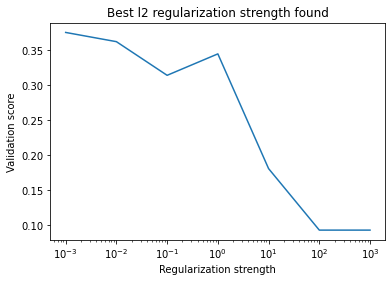

In [ ]:
plt.plot([1000/(10**i) for i in range(7)], l2_validation)
plt.title('Best l2 regularization strength found')
plt.xlabel('Regularization strength')
plt.ylabel('Validation score')
plt.xscale('log')
plt.show()

In [ ]:
print(f"The best regularization score found is {[1000/(10**i) for i in range(7)][np.argmax(l2_validation)]}")

The best regularization score found is 0.001


From the first hyperparameter tuning above, we have found that the best l2 regularization strength is optimal near 0.01. Let's try to use the newly found hyperparameter on our testing set. We will be creating a new remainder set that concistst of both train and validation set previously for best possible performance.

A narrower serach for regularization strength can still be found between 0.001 and 0.1.

> ***A cross-validation search is recommended for overfitting the hyperparameter to the validation set, however, due to the constrant of computational resources and size of the network, we will be ommitting that for now.***

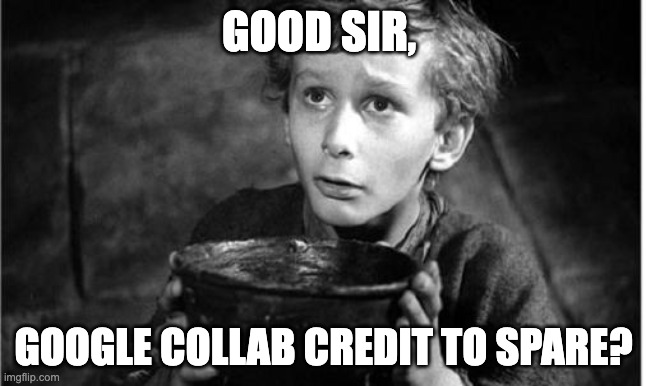

In [ ]:
remainder = load_dataset("train", is_training=True, batch_size=1000)


In [ ]:
# reinitiate params for testing performance
params = avg_params = net.init(jax.random.PRNGKey(42), next(train))
opt_state = opt.init(params)

# Do not alter the number of steps
for step in range(10001):
  if step % 500 == 0:

    # Using ema_update (rolling mean of updated parameters) might not be the best
    # idea, we will leave it as is, and do another test if using params would 
    # results in better accuracies

    val_accuracy = compute_accuracy(params, next(validation))
    test_accuracy = compute_accuracy(params, next(test))
    test_accuracy = jax.device_get(test_accuracy)
    print(f"[Step {step}] Test accuracy: "
          f"{test_accuracy:.3f}.")

  # Setting regularization parameter to be 0.01
  params, opt_state = update(params, opt_state, next(remainder), 0.01)
  avg_params = ema_update(params, avg_params)

[Step 0] Test accuracy: 0.100.
[Step 500] Test accuracy: 0.476.
[Step 1000] Test accuracy: 0.468.
[Step 1500] Test accuracy: 0.474.
[Step 2000] Test accuracy: 0.473.
[Step 2500] Test accuracy: 0.469.
[Step 3000] Test accuracy: 0.471.
[Step 3500] Test accuracy: 0.473.
[Step 4000] Test accuracy: 0.465.
[Step 4500] Test accuracy: 0.472.
[Step 5000] Test accuracy: 0.461.
[Step 5500] Test accuracy: 0.464.
[Step 6000] Test accuracy: 0.473.
[Step 6500] Test accuracy: 0.464.
[Step 7000] Test accuracy: 0.470.
[Step 7500] Test accuracy: 0.471.
[Step 8000] Test accuracy: 0.464.
[Step 8500] Test accuracy: 0.460.
[Step 9000] Test accuracy: 0.462.
[Step 9500] Test accuracy: 0.464.
[Step 10000] Test accuracy: 0.472.


In [ ]:
import sklearn
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

In [ ]:

def model_eval(net, params, batch):
  '''
  Function for model evaluation. Showing the classification report from sklearn,
  and plotting the confusion matrix for each classes of predictions

  -----------------------------
  Input
  net: hk.transformed, haiku neural net architect to be used for predictions
  params: hk.params, parameters to be used in the net model.
  batch: np.array, batch of data to be used for evaluation

  -----------------------------
  Output: None
  '''

  # Generating soft predictions
  y_pred = net.apply(params, batch)

  # Converting soft predictions to hard predictions
  y_hard = np.argmax(y_pred, axis = 1)
  print(classification_report(batch[-1], y_hard))

  disp = ConfusionMatrixDisplay(confusion_matrix(batch[-1], y_hard))
  fig, ax = plt.subplots(figsize = (14, 8))
  disp.plot(ax = ax)
  plt.show()

              precision    recall  f1-score   support

           0       0.57      0.52      0.54      1000
           1       0.51      0.66      0.57      1000
           2       0.33      0.32      0.33      1000
           3       0.35      0.28      0.31      1000
           4       0.39      0.41      0.40      1000
           5       0.42      0.37      0.39      1000
           6       0.53      0.51      0.52      1000
           7       0.50      0.53      0.52      1000
           8       0.54      0.61      0.57      1000
           9       0.53      0.48      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000



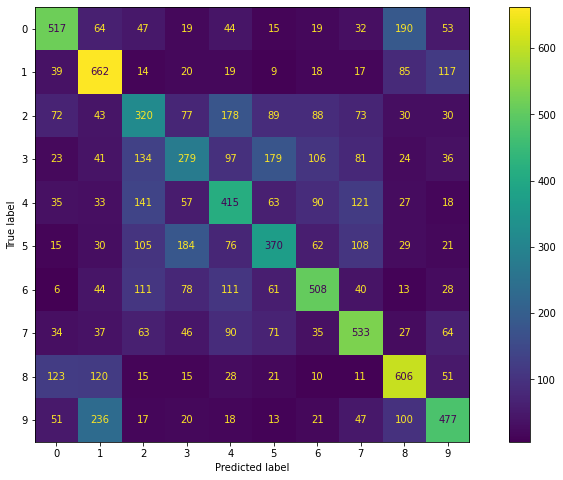

In [ ]:
model_eval(net, params, next(test))

From the model evaluation above, we observe that generally the model is performing somewhat equally in across most classes. However, Classes 2 and 3 has the worst recall and precision (birds and cats), with classes 1 and 8 (automobile and ships) being the most confident.



---



## Coding Challenge Part 2: Compression through Low Rank Approximation (8 points)

In this section, you will add code to compute the low rank approximation and to compute evaluation metrics. We will evaluate whether the low rank approximation allows for speed up in inference time. We define inference time as the average time to compute the prediction for all examples in the test set.

* [**4 points**] You will need to add code to define both the compute_eval_metrics and rank_approximated weight function. 
* [**4 points**] Q4 and Q5 are worth 2 points each.

In [ ]:
import time

def compute_eval_metrics(params, batch, n_samples):
# TODO: add code to compute the time for inference.
  duration_list = []
  accuracy_list = []
  for _ in range(n_samples):
    start = time.time()
    # TODO: add code to correctly compute the accuracy on a given batch.

    # Generating accuracies and inference time for 50 samples,
    # The mean of these can be taken later.
    acc = compute_accuracy(params, batch)
    
    duration = time.time() - start
    duration_list.append(duration)
    accuracy_list.append(acc)

  return accuracy_list, duration_list

In [ ]:
def rank_approximated_weight(weight: jnp.ndarray, rank_fraction: Union[float, bool] = None):
  '''
  Function performing SVD for decomposing weight matrices, with only fraction of ranks 
  included after the decomposition.

  Input
  weight: jnp.array, weight matrices to be decomposed
  rank_fraction: float or None, fraction of ranks to be used for the decomposition.
                 Default to None, where the minimum of weight.shape will be used 
                 (largest rank possible for the weight matrix).
  
  Output:
  u: jnp.ndarray, left matrix of SVD decomposition, scaled by s matrix
  v: jnp.ndarray, right matrix of SVD decomposition.
  '''
  # TODO: replace the code below with code to compute the SVD of the matrix to return the rank approximated weights u and v for a given matrix.
  u, s, v = jnp.linalg.svd(weight)

  # since the full rank approximation with be using u, v matrices with rank min{m, n}, 
  # where m, n represent the 2 dimensions of input matrix,
  # we will be using the fraction as cutoff points to decide how many ranks would be used 
  # to approximate the intended matrix.

  if rank_fraction == None:
    cutoff = int(min(weight.shape))
  else:
    cutoff = int(min(weight.shape) * rank_fraction)
  u = u[:, :cutoff]
  v = v[:cutoff, :]

  # The assertion below will raise an error for certain SVD decomposition with 
  # lower rank chosen. Hence the sanity check is ommited.

  # sanity checking that the svd works
  # print(weight)
  # print(jnp.matmul(u * s[:cutoff], v))
  # assert jnp.allclose(weight, jnp.matmul(u * s[:cutoff], v))

  return u * s[:cutoff] , v

### Evaluations at different ranks

The code below first replaces the weights with the low rank factorizations at different rank fractions. For each modified net, we compute the new eval accuracy. Firstly, add code for the rank_approximated_weight and add code to correctly compute the time for inference (the duration).

In [ ]:
rank_truncated_params = deepcopy(params)
ranks_and_accuracies = []
ranks_and_times = []
for rank_fraction in np.arange(1.0, 0.0, -0.1):

  print(f"Evaluating the model at {rank_fraction}")
  for layer in params.keys():
    if 'conv' in layer:
      continue
    weight = params[layer]['w']
    # TODO: complete coding the rank_approximated_weight function to compute the 
    # SVD of the matrix to return the rank approximated weights u and v for a given matrix.
    u, v = rank_approximated_weight(weight, rank_fraction)
    rank_truncated_params[layer]['w'] = u@v

  test_batch = next(test)
  # we compute metrics over 50 samples to reduce noise in the measurement.
  n_samples = 50
  # TODO: complete coding the compute_eval_metrics function to compute latency 50 seperate times given the batch passed to compute_eval_metrics. Return the average across all latencies you store.
  test_accuracy, latency = compute_eval_metrics(rank_truncated_params, next(test), n_samples)
  print(f"Rank Fraction / Test accuracy: "
          f"{rank_fraction:.2f} / {np.mean(test_accuracy):.3f}.")
  ranks_and_accuracies.append((rank_fraction, np.mean(test_accuracy)))
  print(f"Rank Fraction / Duration: "
          f"{rank_fraction:.2f} / {np.mean(latency):.4f}.")
  print('-------------------------------------------------------------------\n')
  ranks_and_times.append((rank_fraction, np.mean(latency)))

### Q4: What do you observe as the relationship between rank fraction and test accuracy?

Plot this relationship showing accuracy (y-axis) vs rank percentage of the matrix (x-axis). You should use the ranks_and_accuracies list computed above.

Answer:

In [ ]:
## TODO: add your code below to plot the relationship between time and test set accuracy
plt.plot([x[0] for x in ranks_and_accuracies], [x[1] for x in ranks_and_accuracies])
plt.title('Relation between rank fraction and accuracies')
plt.xlabel('Rank Fraction')
plt.ylabel('Accuracies')
plt.show()

From the figure above, we can see that there isn't much difference in accuracies from 1 to 0.6 fraction of ranks. After using less than 0.6 of ranks, we can see that the accuracies starts to drop sharply, as more important latent features started to get excluded.

### Q5: Does replacing the weight matrix with the low factor matrix result in latency speed ups?

Plot the relationship of time (y-axis) vs rank percentage (x-axis). To do so add code to compute the ranks_and_times list.

Answer:

In [ ]:
## TODO: add your code below to plot the relationship between time and rank percentage
plt.plot([x[0] for x in ranks_and_times], [x[1] for x in ranks_and_times])
plt.title('Relation between rank fraction and latency speed')
plt.xlabel('Rank Fraction')
plt.ylabel('Inference time')
plt.show()

In terms of inference time, there isn't a clear indication of relationship towards rank fraction. Since the number of weights is unchanged, there is still roughly the same number of parameter multiplication that was needed to go through to obtain a prediction.

## Coding Challenge Part 3: Perform evaluations on the dataset in factorized space. (4 points)

In this section, you will perform evaluations on the dataset in factorized space.

* [**4 points**] 2 pts for question 6 and question 7.

We will be focusing on the affect of taking partial parameter based on SVD decomposition as number of nuerons in a layer in CNN model. Ideally, by only using the more important weight latent features of the already trained baseline model, we could reduce the inference time hugely and retain decent accuracies from the model.

In [ ]:
def low_rank_net_fn(batch: Batch, rank: float) -> jnp.ndarray:
  
  x = normalize_2(batch[0])
  total_input_dim = np.prod(x.shape[1:])

  # Do not alter the architecture code.
  net = hk.Sequential([
      hk.Conv2D(output_channels=6*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      jax.nn.relu,
      hk.Conv2D(output_channels=16*3, kernel_shape=(5,5)),
      jax.nn.relu,
      hk.AvgPool(window_shape=(2,2), strides=(2,2), padding='VALID'),
      hk.Flatten(),
      hk.Linear(int(rank * min(total_input_dim, 3000)), with_bias=False),
      hk.Linear(3000), jax.nn.relu,
      hk.Linear(int(rank * 2000), with_bias=False), 
      hk.Linear(2000), jax.nn.relu,
      hk.Linear(int(rank * 2000), with_bias=False), 
      hk.Linear(2000), jax.nn.relu,      
      hk.Linear(int(rank * 1000), with_bias=False), 
      hk.Linear(1000), jax.nn.relu,
      hk.Linear(int(rank * 10), with_bias=False),
      hk.Linear(10),
  ])
  return net(x)

In [ ]:
vanilla_to_low_rank_map = {
    'conv2_d': 'conv2_d',
    'conv2_d_1': 'conv2_d_1',
    'linear': ['linear', 'linear_1'],
    'linear_1': ['linear_2', 'linear_3'],
    'linear_2': ['linear_4', 'linear_5'],
    'linear_3': ['linear_6', 'linear_7'],
    'linear_4': ['linear_8', 'linear_9']
}

# Not a good idea to reuse variable names, what if the previous
# acuracies and times is needed to be called again? 

# The name of the lists has been altered with the subfix _factor
ranks_and_accuracies_factor = []
ranks_and_times_factor = []

for rank_fraction in np.arange(1.0, 0.0, -0.1):
  low_rank_net_fn_partial = partial(low_rank_net_fn, rank=rank_fraction)

  # Avoid rewritting the net function, if this code block was to be ran, the
  # previous analysis and output of baseline model will be unusable and had to be
  # retrained, consider using a hidden variable net_ instead, since the variable
  # is only to be used inside the loop.
  net = hk.without_apply_rng(hk.transform(low_rank_net_fn_partial)) 
  low_rank_params = net.init(jax.random.PRNGKey(42), next(train))

  print(f"Evaluating the model at" f"{rank_fraction:.2f}")

  for layer in vanilla_to_low_rank_map.keys():
    if 'conv' in layer:
      low_rank_params[layer] = params[layer]
      continue
    weight = params[layer]['w']
    # TODO: complete coding the rank_approximated_weight function to compute the SVD of the matrix to return the rank approximated weights u and v for a given matrix.
    u, v = rank_approximated_weight(weight, rank_fraction)
    low_rank_params[vanilla_to_low_rank_map[layer][0]]['w'] = u
    low_rank_params[vanilla_to_low_rank_map[layer][1]]['w'] = v
    low_rank_params[vanilla_to_low_rank_map[layer][1]]['b'] = params[layer]['b']
  
  # TODO: modify the compute_eval_metrics function below to compute the time taken for inference.
  test_accuracy, duration = compute_eval_metrics(low_rank_params, next(test), 50)
  ranks_and_times_factor.append((rank_fraction, np.mean(duration)))
  ranks_and_accuracies_factor.append((rank_fraction, np.mean(test_accuracy)))
  print(f"Rank Fraction / Test accuracy: "
          f"{rank_fraction:.2f} / {np.mean(test_accuracy):.3f}.")
  print(f"Rank Fraction / Duration: "
          f"{rank_fraction:.2f} / {np.mean(duration):.4f}.")

### Q6: Plot a curve showing time vs rank percentage of the matrix 

In [ ]:
# TODO: add code to plot the relationship between time vs percentage rank of the matrix.
plt.plot([x[0] for x in ranks_and_times_factor], [x[1] for x in ranks_and_times_factor])
plt.title('Relation between rank fraction and latency speed')
plt.xlabel('Rank Fraction')
plt.ylabel('Inference time')
plt.show()

In [ ]:
plt.plot([x[0] for x in ranks_and_accuracies_factor], [x[1] for x in ranks_and_accuracies_factor])
plt.title('Relation between rank fraction and latency speed')
plt.xlabel('Rank Fraction')
plt.ylabel('Inference time')
plt.show()

### Q7: What do you observe between time and the percentage rank of the matrix.

### Put your answer here:

As mentioned before, the number of elements after SVD decomposition is O(k(m+n)). Hence we have a linear decrease of inference time with the rank fraction (~k). The test accuracy also only dropped slightly from 1 to 0.6 fraction, hence the optimal range for rank fraction is around 0.5 to 0.7, depending on the emphasize on accuracies or inference time.



---



## Coding Challenge Part 4: Take this Further (10 bonus points)

This part of the challenge is designed to be open ended. If you wanted to show some more skills, here is your chance to shine. We include two options below -- **only do one of the options**:

**Option 1:** Implement a change that isn't SVD but minimizes inference latency while preserving accuracy. Can you outperform SVD? 



**Option 2:** Improve the quality of code for this takehome. Pretend you are reviewing a peer and add comments to cells with suggestions of how to improve the code quality. Try and make your comments action orientated and precise. 


**For Option 1, DO NOT alter the previous code sections, instead add any new code below. You should not need to add new code for Option 2, instead just add comments to cells.**


In [ ]:
# TODO: add code for option 1 here

## You have made it to the end of the challenge!

Before you submit your completed challenge document, please make sure to **save and pin your revisions** before submitting a link to your submission via the [Cohere For AI Scholars Program Application.](https://jobs.lever.co/cohere/) 